# NTS Data




In [1]:
import random

from scipy.stats import norm
import numpy as np
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from pathlib import Path

from caveat.evaluate.describe import features
from caveat.evaluate.describe.times import (
    joint_time_distributions_plot,
    times_distributions_plot,
)
from caveat.evaluate.describe.transitions import sequence_prob_plot
from caveat.evaluate.distance import mape, emd
from caveat.evaluate.features import participation, times

In [2]:
attributes = pd.read_csv(
    "C:/Users/fred/Projects/caveat/tmp/nts_home_attributes.csv"
)

schedules = pd.read_csv(
    "C:/Users/fred/Projects/caveat/tmp/nts_home_schedules.csv"
)
synth_path = Path("C:/Users/fred/Projects/caveat/experiments/cvaes5_add2")

kld0 = pd.read_csv(
    synth_path / "CVAESeqLSTM_6x6x512_kld0/version_0/synthetic_schedules.csv"
)
kld0001 = pd.read_csv(
    synth_path / "CVAESeqLSTM_6x6x512_kld0001/version_0/synthetic_schedules.csv"
)
kld0005 = pd.read_csv(
    synth_path / "CVAESeqLSTM_6x6x512_kld0005/version_0/synthetic_schedules.csv"
)
kld001 = pd.read_csv(
    synth_path / "CVAESeqLSTM_6x6x512_kld001/version_0/synthetic_schedules.csv"
)
kld005 = pd.read_csv(
    synth_path / "CVAESeqLSTM_6x6x512_kld005/version_0/synthetic_schedules.csv"
)
kld01 = pd.read_csv(
    synth_path / "CVAESeqLSTM_6x6x512_kld01/version_0/synthetic_schedules.csv"
)

synthetic_attributes = pd.read_csv(
    synth_path / "CVAESeqLSTM_6x6x512_kld0/version_0/synthetic_attributes.csv"
)

cvaes = {
    "kld0": kld0,
    "kld0001": kld0001,
    "kld0005": kld0005,
    "kld001": kld001,
    "kld005": kld005,
    "kld01": kld01,
}


def age_group(age):
    if age < 17:
        return "child"

    elif age < 30:
        return "young adult"

    elif age < 65:
        return "adult"

    else:
        return "senior"


def fix_ethnicity(x):
    if x == "unknown":
        return "white"

    return x


def fix_car_access(x):
    if x == "unknown":
        return "yes"

    return x


def fix_children(x):
    if x > 2:
        return "3+"

    return str(x)


income_groups = {1: "lowest", 2: "low", 3: "medium", 4: "high", 5: "highest"}

attributes["age_group"] = attributes["age"].apply(age_group)
attributes["income_group"] = attributes["income"].apply(
    lambda x: income_groups[x]
)
attributes["ethnicity"] = attributes["ethnicity"].apply(fix_ethnicity)
attributes["car_access"] = attributes["car_access"].apply(fix_car_access)
attributes["hh_children"] = attributes["hh_children"].apply(fix_children)

In [3]:
attributes.work_status.value_counts()

work_status
employed      21269
unemployed    17583
student         998
Name: count, dtype: int64

In [4]:
synthetic_attributes.work_status.value_counts()

work_status
employed      21269
unemployed    17583
student         998
Name: count, dtype: int64

In [5]:
def filter_on(attributes, schedules, on):
    values = attributes[on].value_counts()
    selected = {}
    for value in values.index:
        pids = attributes[attributes[on] == value]["pid"]
        selected[value] = schedules[schedules["pid"].isin(pids)]
    return selected


def participation_table(schedules, groups):
    participation_rates = {
        ("observed", "all"): schedules.act.value_counts(normalize=True)
    }
    for name, group in groups.items():
        for key, data in group.items():
            participation_rates[(name, key)] = data.act.value_counts(
                normalize=True
            )

    return pd.DataFrame(participation_rates)


observed_work_status = filter_on(attributes, schedules, "work_status")
kld0_work_status = filter_on(synthetic_attributes, kld0, "work_status")
kld0001_work_status = filter_on(synthetic_attributes, kld0001, "work_status")
kld0005_work_status = filter_on(synthetic_attributes, kld0005, "work_status")
kld001_work_status = filter_on(synthetic_attributes, kld001, "work_status")
kld005_work_status = filter_on(synthetic_attributes, kld005, "work_status")
kld01_work_status = filter_on(synthetic_attributes, kld01, "work_status")

work_status_groups = {
    "observed": observed_work_status,
    "kld0": kld0_work_status,
    "kld0001": kld0001_work_status,
    "kld0005": kld0005_work_status,
    "kld001": kld001_work_status,
    "kld_005": kld005_work_status,
    "kld_01": kld01_work_status,
}

df = participation_table(schedules, work_status_groups).T
df["work"]

observed  all           0.069052
          employed      0.126750
          unemployed    0.001159
          student       0.015847
kld0      employed      0.001243
          unemployed    0.001258
          student       0.003797
kld0001   employed      0.019122
          unemployed    0.010100
          student       0.006481
kld0005   employed      0.100243
          unemployed    0.119731
          student       0.115584
kld001    employed      0.087698
          unemployed    0.074711
          student       0.072464
kld_005   employed      0.095979
          unemployed    0.071538
          student       0.081745
kld_01    employed      0.092728
          unemployed    0.089493
          student       0.093445
Name: work, dtype: float64

In [6]:
df["work"].unstack(-1)

,all,employed,student,unemployed
kld0,NaN,0.001243,0.003797,0.001258
kld0001,NaN,0.019122,0.006481,0.010100
kld0005,NaN,0.100243,0.115584,0.119731
kld001,NaN,0.087698,0.072464,0.074711
kld_005,NaN,0.095979,0.081745,0.071538
kld_01,NaN,0.092728,0.093445,0.089493
observed,0.069052,0.126750,0.015847,0.001159


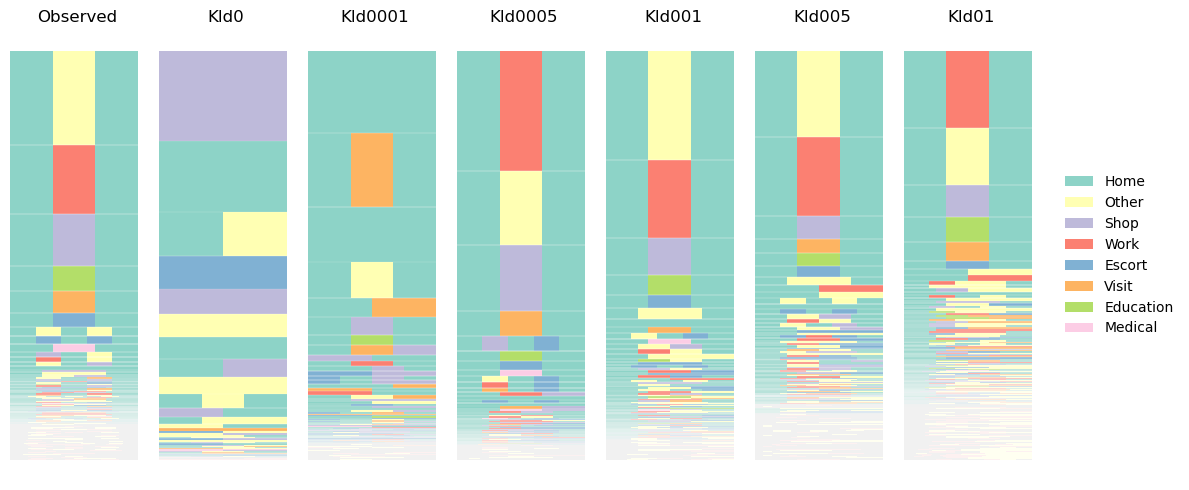

In [7]:
fig = sequence_prob_plot(schedules, cvaes)

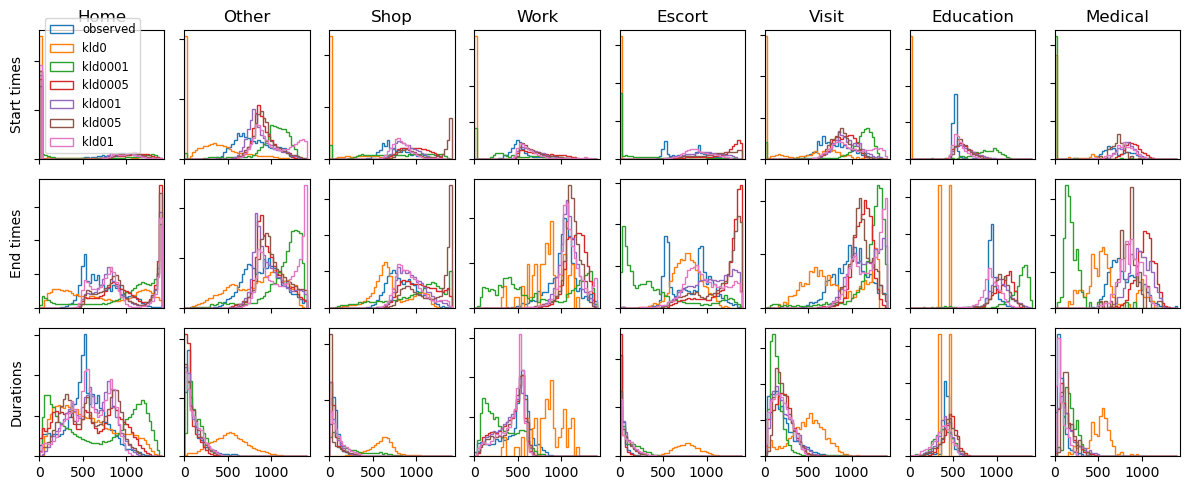

In [8]:
fig = times_distributions_plot(schedules, cvaes)

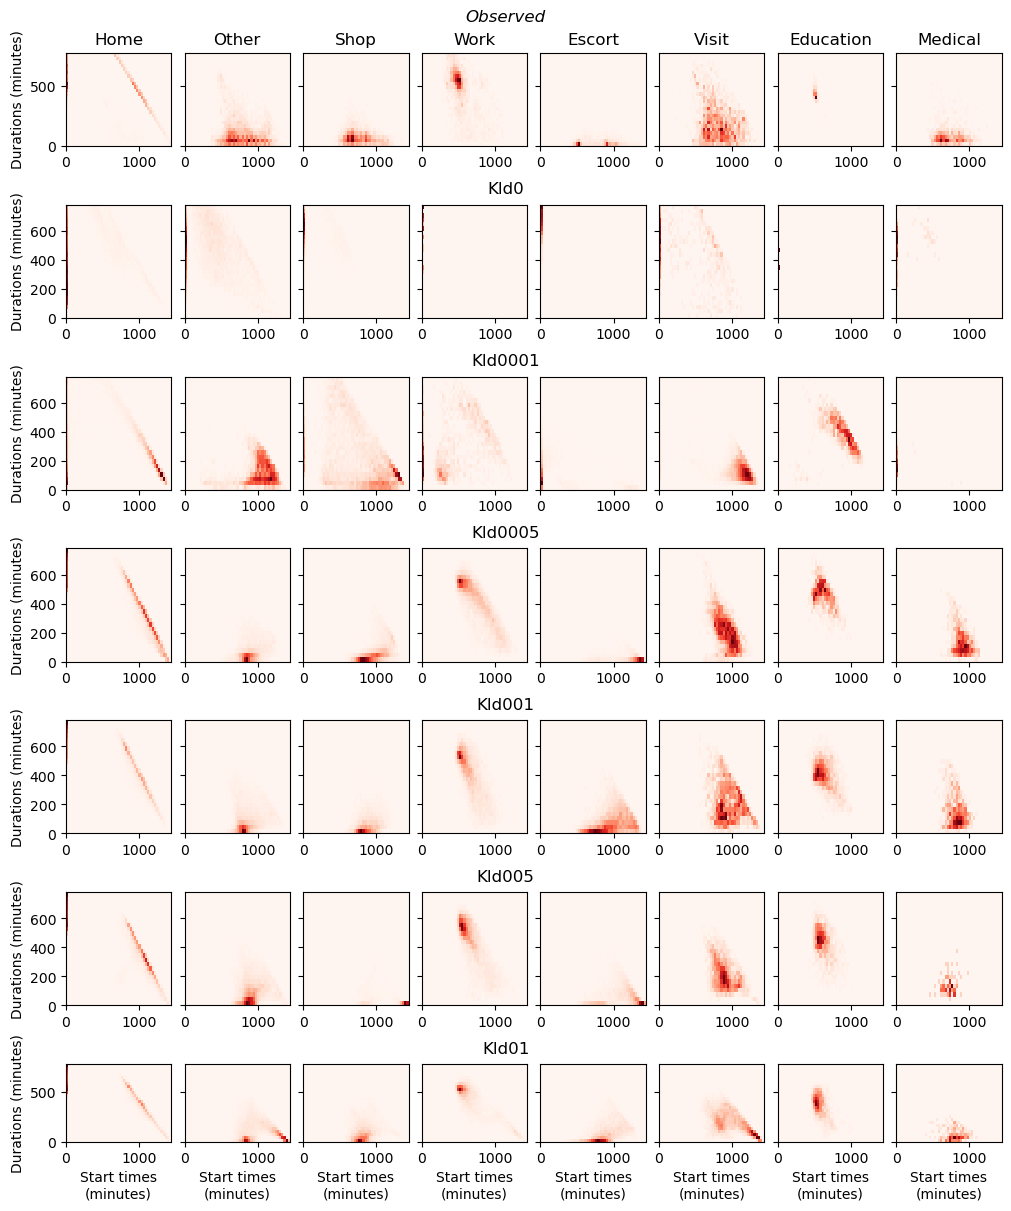

In [9]:
fig = joint_time_distributions_plot(schedules, cvaes, figsize=(10, 12))

In [10]:
inferred_zs = {}
in_attributes = {}
for name in ["kld0", "kld0001", "kld0005", "kld001", "kld005", "kld01"]:
    path = synth_path / f"CVAESeqLSTM_6x6x512_{name}/version_0/test_inference"
    inferred_z = pd.read_csv(path / "zs.csv", header=None)
    inferred_zs[name] = inferred_z
    in_attribute = pd.read_csv(path / "input_attributes.csv")
    in_attributes[name] = in_attribute
    print(name, len(inferred_z), len(in_attribute))

kld0 3730 3730
kld0001 3730 3730
kld0005 3730 3730
kld001 3730 3730
kld005 3730 3730
kld01 3730 3730


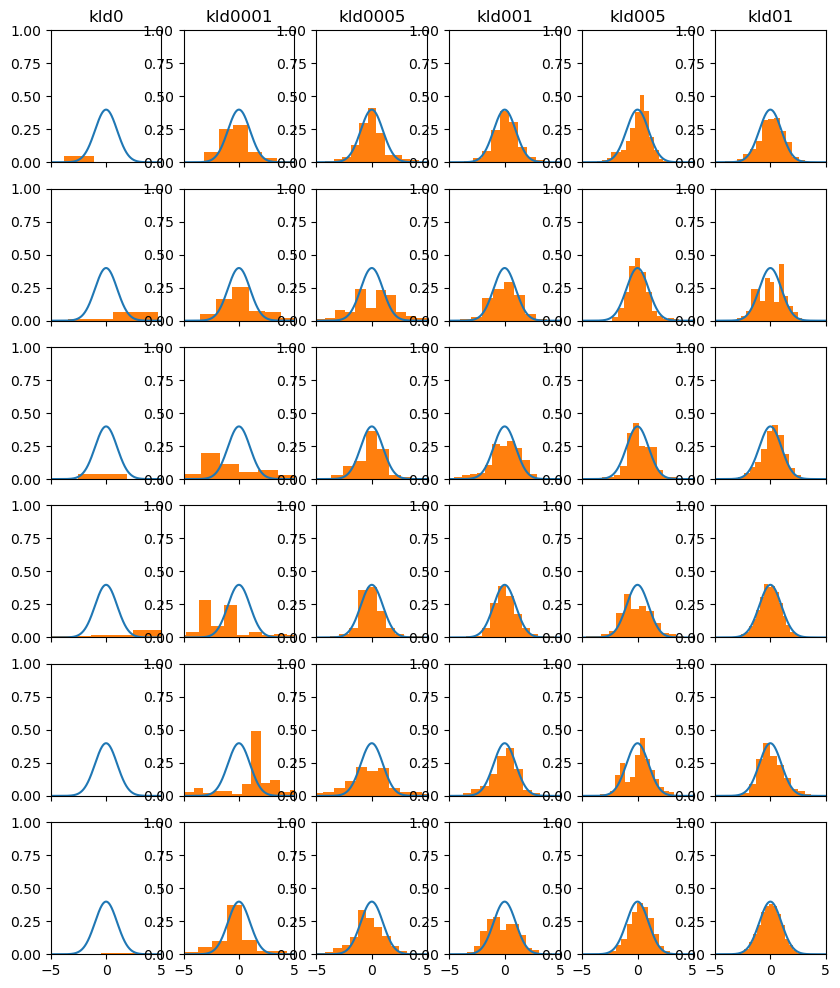

In [11]:
x_axis = np.arange(-10, 10, 0.001)
n = norm.pdf(x_axis, 0, 1)


def kld(a, b):
    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


fig, axs = plt.subplots(6, 6, figsize=(10, 12), sharey=False, sharex=True)
for c, (name, data) in enumerate(inferred_zs.items()):
    axs[0, c].set_title(name)
    for i in range(6):
        axs[i, c].plot(x_axis, n)
        axs[i, c].hist(data.iloc[:, i], bins=20, density=True)
        axs[i, c].set_xlim((-5, 5))
        axs[i, c].set_ylim((0, 1))

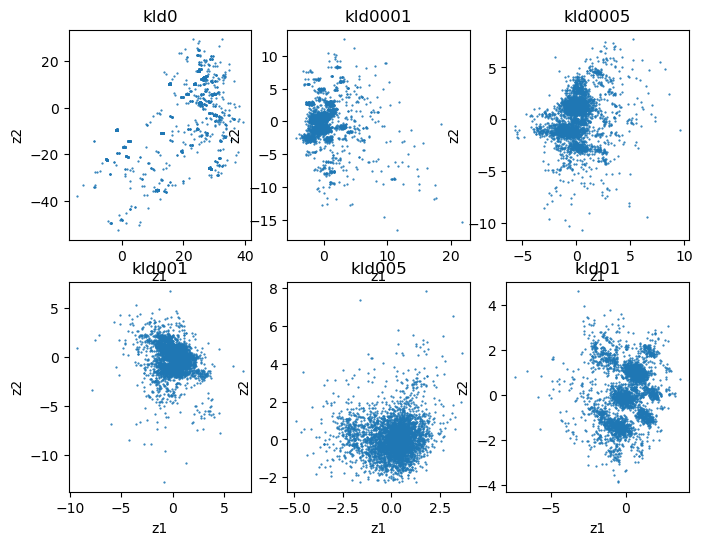

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(8, 6))
for ax, (name, data) in zip(axs.flatten(), inferred_zs.items()):
    ax.set_title(name)
    ax.set_xlabel("z1")
    ax.set_ylabel("z2")
    ax.scatter(data.loc[:, 0], data.loc[:, 1], alpha=1, s=0.3)

In [13]:
for name, data in inferred_zs.items():
    print(f"{name}: {(data.corr().sum().sum()-6)/2}")

inferred_zs["kld0005"].corr()

kld0: -2.0662925322045407
kld0001: -1.1442384488572621
kld0005: 0.975931149236426
kld001: -0.7219965012768226
kld005: 0.6914570770290522
kld01: 0.08644523622980316


,0,1,2,3,4,5
0,1.000000,0.216045,0.070445,-0.044238,0.357477,-0.151973
1,0.216045,1.000000,-0.018458,-0.040891,0.060659,-0.135977
2,0.070445,-0.018458,1.000000,-0.280488,-0.060433,0.247701
3,-0.044238,-0.040891,-0.280488,1.000000,0.077128,0.369988
4,0.357477,0.060659,-0.060433,0.077128,1.000000,0.308946
5,-0.151973,-0.135977,0.247701,0.369988,0.308946,1.000000


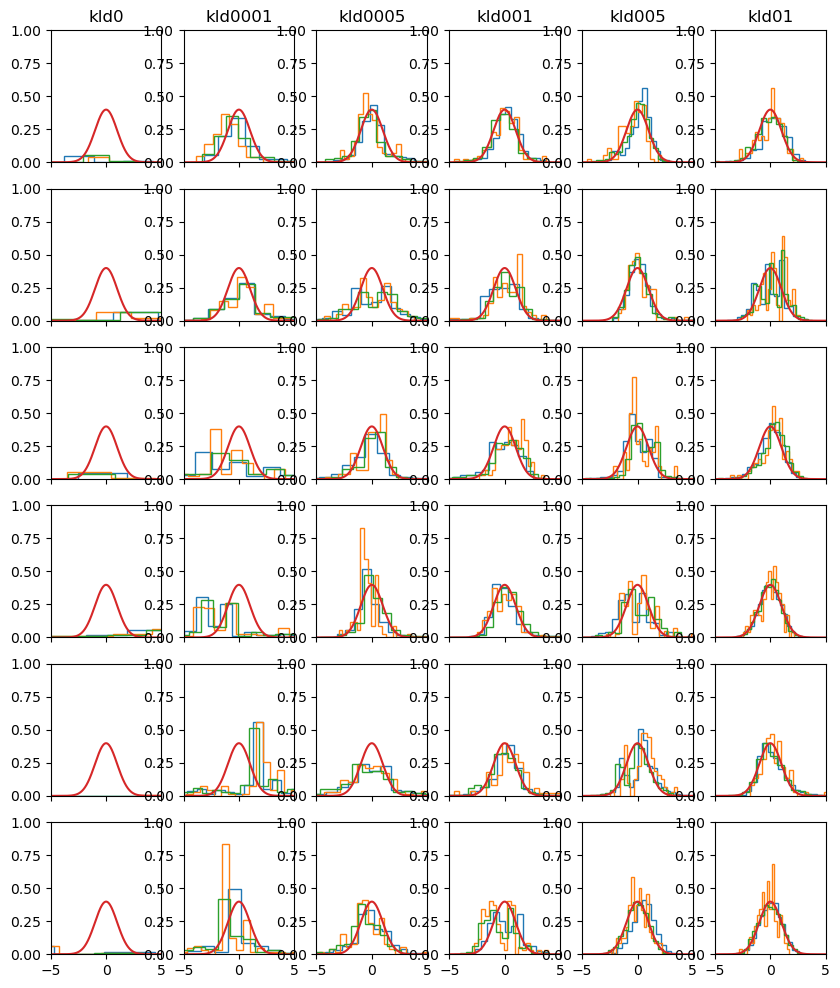

In [14]:
x_axis = np.arange(-10, 10, 0.001)
n = norm.pdf(x_axis, 0, 1)


def kld(a, b):
    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


fig, axs = plt.subplots(6, 6, figsize=(10, 12), sharey=False, sharex=True)
for c, (name, data) in enumerate(inferred_zs.items()):
    data = data.copy()
    data["atts"] = in_attributes[name].work_status
    axs[0, c].set_title(name)
    for i in range(6):
        for j, group in data.groupby("atts"):
            axs[i, c].hist(group[i], bins=20, histtype="step", density=True)
        axs[i, c].plot(x_axis, n)
        axs[i, c].set_xlim((-5, 5))
        axs[i, c].set_ylim((0, 1))

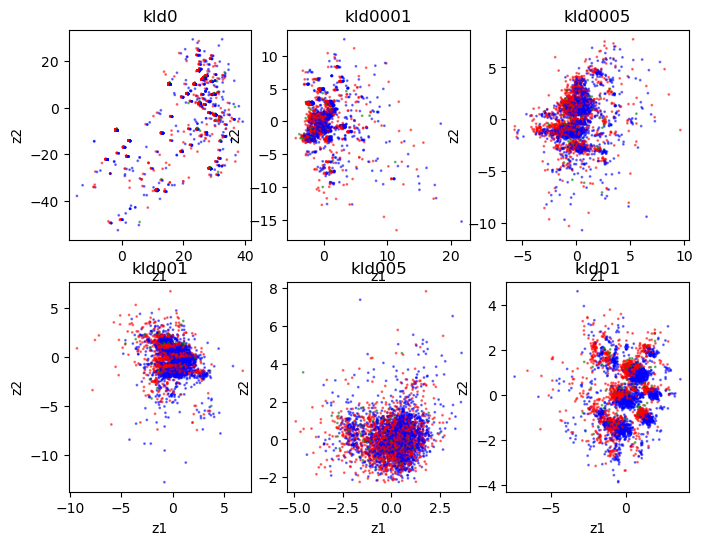

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(8, 6))
for ax, (name, data) in zip(axs.flatten(), inferred_zs.items()):
    atts = in_attributes[name]
    colors = list(
        atts.work_status.map(
            {"employed": "blue", "unemployed": "red", "student": "green"}
        )
    )
    ax.set_title(name)
    ax.set_xlabel("z1")
    ax.set_ylabel("z2")
    ax.scatter(data.loc[:, 0], data.loc[:, 1], alpha=0.5, s=1, c=colors)

In [24]:
import pickle

import pandas as pd
import torch
from pytorch_lightning import Trainer

from caveat import models
from caveat.data import build_custom_gen_dataloader


class Generator:
    def __init__(
        self, ckpt_path, schedule_encoder_path, attributes_encoder_path
    ) -> None:
        # load model from checkpoint
        self.model = models.sequence.cvae_sequence_lstm_add2.CVAESeqLSTMAdd2.load_from_checkpoint(
            ckpt_path
        )

        # load encoders
        with open(schedule_encoder_path, "rb") as f:
            self.schedule_encoder = pickle.load(f)

        with open(attributes_encoder_path, "rb") as f:
            self.attributes_encoder = pickle.load(f)

        self.ckpt_path = ckpt_path
        self.trainer = Trainer()

    def __call__(self, synthetics):
        return self.gen(synthetics)

    # def gen(self, synthetics):
    #     return trim(stretch(pad(self._gen(synthetics))))

    def _gen(self, synthetics, z):
        synthetic_conditionals = self.attributes_encoder.encode(synthetics)

        dataloader = build_custom_gen_dataloader(
            synthetic_conditionals, z, max(len(synthetic_conditionals), 256)
        )

        res = self.trainer.predict(
            model=self.model, ckpt_path=self.ckpt_path, dataloaders=dataloader
        )
        ys, res, zs = zip(*res)

        schedules = self.schedule_encoder.decode(torch.concat(res))
        return schedules


synthetics = pd.DataFrame(
    [
        {"work_status": "employed"},
        {"work_status": "unemployed"},
        {"work_status": "student"},
    ]
)
zs = torch.Tensor([[0] * 6] * 3)
gen_path = synth_path / "CVAESeqLSTM_6x6x512_kld005/version_0"
Generator(
    ckpt_path=gen_path / "checkpoints/epoch=22-step=1518.ckpt",
    schedule_encoder_path=gen_path / "schedule_encoder.pkl",
    attributes_encoder_path=gen_path / "attribute_encoder.pkl",
)._gen(synthetics, zs)

GPU available: True (cuda), used: True


init Experiment: {'name': 'CVAESeqLSTMAdd2', 'latent_dim': 6, 'hidden_layers': 6, 'hidden_size': 512, 'dropout': 0.2, 'scheduler_gamma': 0.95}
Found input shape: torch.Size([16, 2])
Found conditionals size: 3
Found teacher forcing ratio: 0.5
Found KLD weight: 0.005
Found duration weight: 1.0
Using mask: True
Decoder using topk sampling


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at C:\Users\fred\Projects\caveat\experiments\cvaes5_add2\CVAESeqLSTM_6x6x512_kld005\version_0\checkpoints\epoch=22-step=1518.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at C:\Users\fred\Projects\caveat\experiments\cvaes5_add2\CVAESeqLSTM_6x6x512_kld005\version_0\checkpoints\epoch=22-step=1518.ckpt


Building dataloader with 3 samples, latent_dim=3, batch_size=256, num_workers=4


Predicting: |          | 0/? [00:00<?, ?it/s]

,pid,act,start,end,duration
0,0,home,0,806,806
1,0,other,806,1185,379
2,1,home,0,815,815
3,1,other,815,857,42
4,1,home,857,1421,564
5,2,home,0,983,983
6,2,other,983,1170,187


In [ ]:
attributes.work_status.value_counts()

work_status
employed      21269
unemployed    17583
student         998
Name: count, dtype: int64

In [ ]:
data = inferred_zs["kld005"]
atts = in_attributes["kld005"]
colors = list(
    atts.work_status.map(
        {"employed": "blue", "unemployed": "red", "student": "yellow"}
    )
)
fig = ax.scatter(data.loc[:, 0], data.loc[:, 1], alpha=1, s=0.3, c=colors)

In [ ]:
observed_work_status["unemployed"].act.value_counts()

In [ ]:
kld1_work_status["unemployed"].act.value_counts()

In [ ]:
def split(attributes, schedules):
    splits = {}
    splits["gender"] = filter_on(attributes, schedules, "gender")
    splits["age"] = filter_on(attributes, schedules, "age_group")
    splits["age"] = {
        i: splits["age"][i] for i in ["senior", "adult", "young adult", "child"]
    }
    splits["ethnicity"] = filter_on(attributes, schedules, "ethnicity")
    splits["education"] = filter_on(attributes, schedules, "education")
    splits["license"] = filter_on(attributes, schedules, "license")
    splits["car_access"] = filter_on(attributes, schedules, "car_access")
    splits["work"] = filter_on(attributes, schedules, "work_status")
    splits["area"] = filter_on(attributes, schedules, "area")
    splits["income"] = filter_on(attributes, schedules, "income_group")
    splits["income"] = {
        i: splits["income"][i]
        for i in ["highest", "high", "medium", "low", "lowest"]
    }
    splits["hh"] = filter_on(attributes, schedules, "hh_composition")
    splits["children"] = filter_on(attributes, schedules, "hh_children")
    splits["children"] = {
        i: splits["children"][i] for i in ["0", "1", "2", "3+"]
    }
    return splits


observed_splits = split(attributes, schedules)
cvae_splits = split(attributes, cvae)
vae_splits = split(attributes, vae)
rnn_splits = split(attributes, rnn)
kld0_splits = split(attributes, kld0)
kld1_splits = split(attributes, kld1)
kld100_splits = split(attributes, kld100)

In [ ]:
build_table(
    schedules,
    [
        gender_filtered,
        age_filtered,
        education_filtered,
        work_filtered,
        license_filtered,
        area_filtered,
        income_filtered,
    ],
    #   car_access_filtered, work_filtered, area_filtered, income_filtered],
    lambda x: features.average(times.start_times_by_act(x)),
)

In [ ]:
build_table(
    schedules,
    [
        gender_filtered,
        age_filtered,
        education_filtered,
        license_filtered,
        area_filtered,
        income_filtered,
    ],
    lambda x: features.sd(times.start_times_by_act(x)),
)

In [ ]:
fig = times_distributions_plot(schedules, work_filtered)

In [ ]:
def plot_times(
    subs,
    column="start",
    acts=None,
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
):
    if acts is None:
        acts = set()
        for data in subs.values():
            acts.update(set(data.act))

    print("acts: ", acts)

    splits = {
        k: extract_activities(v, column, minimum, maximum)
        for k, v in subs.items()
    }
    print(splits.keys())

    return plot_bins(
        splits,
        acts,
        column,
        normalise=normalise,
        minimum=minimum,
        maximum=maximum,
        width=plot_width,
    )


def extract_activities(schedules, column, minimum, maximum):
    if schedules.empty:
        return pd.DataFrame()
    data = schedules.copy()
    if minimum is not None:
        data = data[data[column] >= minimum]
    if maximum is not None:
        data = data[data[column] <= maximum]
    return pd.DataFrame(
        {
            "act": data.act,
            "start": (data.start).astype(int),
            "end": (data.end).astype(int),
            "duration": (data.duration).astype(int),
        }
    )


def plot_bins(
    splits,
    acts,
    column,
    width=10,
    height_factor=1.2,
    normalise=False,
    minimum=0,
    maximum=1440,
):
    fig, axs = plt.subplots(
        len(acts),
        figsize=(width, len(acts) * (len(splits) + 1) / 4),
        sharex=False,
    )
    if not isinstance(axs, np.ndarray):
        axs = [axs]

    mmhours = int(minimum / 60)
    mxhours = int(maximum / 60)
    duration = mxhours - mmhours
    step = 2

    for ax, act in zip(axs, acts):
        keys = list(splits.keys())
        n_keys = len(keys)
        binned = time_binner(splits, act, column, minimum, maximum)
        if normalise:
            binned = binned / binned.max()
        ax.pcolormesh(
            binned.T, cmap="gist_heat_r", edgecolors="white", linewidth=0.5
        )
        ax.xaxis.set_ticks([i for i in range(0, duration * 4 + 1, 8)])
        ax.set_xticklabels(
            [f"{h:02}:00" for h in range(mmhours, mxhours + 1, step)],
            size="small",
        )
        ax.yaxis.set_ticks([i + 0.5 for i in range(n_keys)])
        ax.yaxis.set_ticklabels(keys)
        ax.grid(which="minor", color="w", linestyle="-", linewidth=2)
        ax.tick_params(right=True, labelright=True)
        for pos in ["top", "bottom"]:
            ax.spines[pos].set_visible(False)
        ax.set_title(act.title(), fontsize="medium", rotation=0)

    fig.tight_layout()
    return fig


def time_binner(splits, act, column, minimum, maximum):
    """Bin start and end times and durations, return freq table for X hour period, 15min intervals."""
    bins = list(range(minimum, maximum + 1, 15))
    # bins[-1] = 100 * 60
    start = f"{int(minimum/60):02}:00:00"
    periods = int((maximum - minimum) / 15)
    labels = pd.timedelta_range(start=start, periods=periods, freq="15min")
    binned = pd.DataFrame(
        index=pd.timedelta_range(start=start, periods=periods, freq="15min")
    )
    for key, data in splits.items():
        if data.empty:
            continue
        split = data[data.act == act]
        if len(split) == 0:
            continue
        binned[key] = pd.cut(
            split[column], bins, labels=labels, right=False
        ).value_counts()

    return binned


def plot_times_compare(
    splits,
    column="start",
    acts=None,
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
):
    if acts is None:
        acts = set()
        for k, split in splits.items():
            for i, data in split.items():
                if data.empty:
                    continue
                acts.update(set(data.act))

    print("acts: ", acts)

    processed_splits = {}
    for name, split in splits.items():
        processed_splits[name] = {
            k: extract_activities(v, column, minimum, maximum)
            for k, v in split.items()
        }
    print(splits.keys())

    return plot_bins_compare(
        splits,
        acts,
        column,
        normalise=normalise,
        minimum=minimum,
        maximum=maximum,
        width=plot_width,
    )


def plot_bins_compare(
    splits,
    acts,
    column,
    width=10,
    height_factor=1.2,
    normalise=False,
    minimum=0,
    maximum=1440,
):
    fig = plt.figure(
        # constrained_layout=True,
        figsize=(width, len(acts) * (len(splits) + 1) * len(splits) / 4)
    )

    subfigs = fig.subfigures(len(acts), 1)
    mmhours = int(minimum / 60)
    mxhours = int(maximum / 60)
    duration = mxhours - mmhours
    step = 2

    for act, subfig in zip(acts, subfigs.flat):
        # subfig.suptitle(f'Subfig {outerind}')
        axs = subfig.subplots(len(splits), 1)
        for name, split, ax in zip(splits.keys(), splits.values(), axs.flat):
            ax.set_title(f"{name} {act}")
            keys = list(split.keys())
            n_keys = len(keys)
            binned = time_binner(split, act, column, minimum, maximum)
            if normalise:
                binned = binned / binned.max()
            ax.pcolormesh(
                binned.T, cmap="gist_heat_r", edgecolors="white", linewidth=0.5
            )
            ax.set_xticks([])
            ax.yaxis.set_ticks([i + 0.5 for i in range(n_keys)])
            ax.yaxis.set_ticklabels(keys)
            ax.grid(which="minor", color="w", linestyle="-", linewidth=2)
            ax.tick_params(right=True, labelright=True)
            for pos in ["top", "bottom"]:
                ax.spines[pos].set_visible(False)
            # ax.set_title(act.title(), fontsize="medium", rotation=0)
        ax.xaxis.set_ticks([i for i in range(0, duration * 4 + 1, 8)])
        ax.set_xticklabels(
            [f"{h:02}:00" for h in range(mmhours, mxhours + 1, step)],
            size="small",
        )

    # fig.tight_layout()
    return fig


fig = plot_times_compare(
    splits={
        "obs": observed_splits["work"],
        "kld0": kld0_splits["work"],
        "kld1": kld1_splits["work"],
    },
    acts=["home", "shop"],
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

In [ ]:
fig = plot_times_compare(
    splits={
        "obs": observed_splits["age"],
        "KLD1": KLD1_splits["age"],
        "KLD100": KLD100_splits["age"],
        "KLD10000": KLD10000_splits["age"],
    },
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

In [ ]:
fig = plot_times(
    observed_splits["work"],
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

In [ ]:
fig = plot_times(
    children_filtered,
    column="start",
    normalise=False,
    minimum=0,
    maximum=1440,
    plot_width=10,
)

In [ ]:
op = lambda x: features.average(participation.participation_rates_by_act(x))

build_table(
    schedules,
    [
        gender_filtered,
        age_filtered,
        education_filtered,
        license_filtered,
        area_filtered,
        income_filtered,
    ],
    op,
)

In [ ]:
fig = sequence_prob_plot(schedules, observed_splits["age"], figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(cvae, cvae_splits["work"], figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(schedules, education_filtered, figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(schedules, income_filtered, figsize=(12, 4))

In [ ]:
fig = sequence_prob_plot(schedules, area_filtered, figsize=(12, 4))

In [ ]:
fig = joint_time_distributions_plot(schedules, gender_filtered, figsize=(10, 6))

In [ ]:
fig = joint_time_distributions_plot(schedules, age_filtered, figsize=(10, 8))